# Data

Team: Maksym Del

Note: as this project has making a benchmark at its core, gathering dataset was the key activity.
Following works will use GPT3 API to test the knowledge of the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We gathered dataset of 192 detective puzzles from the https://www.5minutemystery.com/. 
</br>Detective puzzle is a short mystery story describing some crime. 
</br>Each detective puzzle has a list of suspects and a correct answer.
</br>So the task is formulated as a multiple-choice question answering.
</br>Additionaly, every detective puzzle also has a full answer, describing how the guilty suspect actually performed his crime.
</br>While the question is to find the person who is guilty in most cases, </br>some times the puzzle is formulated as a question about the place and or an event that happened in the crime.
 
</br>This notebook performes exploratory data analysis on the dataset.   

In [2]:
# Read in the data
df = pd.read_csv('detective-puzzles.csv')

In [5]:
# change order of columns
df = df[['case_name', 'case_url', 'author_name', 'author_url', 'attempts', 'solve_rate', 'mystery_text', 'answer_options', 'answer', 'outcome']]

### Solve rate

Every detective puzzle was solved on the 5minutemystery.com website by users many times so it is meaningful to talk about solve rate of each puzzle individually.

In [6]:
df['solve_rate'].mean()

47.018324607329845

In [315]:
# count of cases by author
df['author_name'].value_counts()

Moe Zilla            43
Tom Fowler           42
William Shepard      24
Laird Long           18
Robbie Cutler        12
Barney Parmington    10
Stefanina Hill        6
Steve Shrott          6
Nick Andreychuk       5
Nicholas LeVack       4
Ernest Capraro        2
Andrea Hein           2
Doug Fellin           2
Tammy-Lee Miller      2
Meghan Ford           1
Brad Marsh            1
Susanne Shaphren      1
Randy Godwin          1
Ryan Hogan            1
Matthew Lieff         1
Perry McCarney        1
Nicholas Lovell       1
Mike Wever            1
Meg A.  Write         1
Elsa Darcy            1
PIP Writer            1
Julie Hockenberry     1
Name: author_name, dtype: int64

In [ ]:
Moe Zilla, Tom Fowler, William Shepard, Laird Long, Robbie Cutler, Barney Parmington, Stefanina Hill, Steve Shrott, Nick Andreychuk, Nicholas LeVack, Ernest Capraro, Andrea Hein, Doug Fellin, Tammy-Lee Miller, Meghan Ford, Brad Marsh, Susanne Shaphren, Randy Godwin, Ryan Hogan, Matthew Lieff, Perry McCarney, Nicholas Lovell, Mike Wever, Meg A. Write, Elsa Darcy, PIP Writer, Julie Hockenberry

In [343]:
# just list all authors in the order of most cases to least
", ".join(list(df['author_name'].value_counts().index))

'Moe Zilla, Tom Fowler, William Shepard, Laird Long, Robbie Cutler, Barney Parmington, Stefanina Hill, Steve Shrott, Nick Andreychuk, Nicholas LeVack, Ernest Capraro, Andrea Hein, Doug Fellin, Tammy-Lee Miller, Meghan Ford, Brad Marsh, Susanne Shaphren, Randy Godwin, Ryan Hogan, Matthew Lieff, Perry McCarney, Nicholas Lovell, Mike Wever, Meg A.  Write, Elsa Darcy, PIP Writer, Julie Hockenberry'

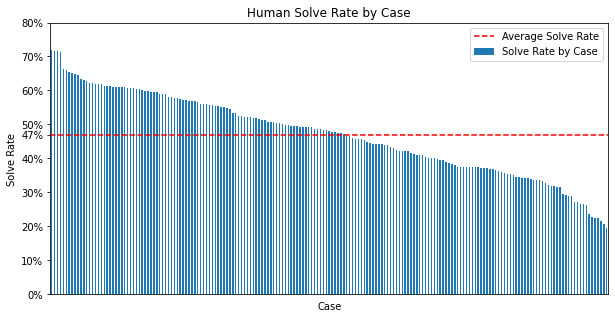

In [64]:
# plot solve rate (y) in decreasing order with a bar chart
df.sort_values(by='solve_rate', ascending=False).plot.bar(x=None, y='solve_rate', figsize=(10, 5), title='Human Solve Rate by Case')
# skip x axes labels
plt.xticks([])
# add mean solve rate as a horizontal line
plt.axhline(df['solve_rate'].mean(), color='r', linestyle='--')
# add mean solve rate line to the legend
plt.legend(['Average Solve Rate', 'Solve Rate by Case'])

plt.yticks(np.append(plt.yticks()[0], df['solve_rate'].mean()))

# round y ticks to 0 decimal places and add percentage symbol
plt.yticks([round(x, 0) for x in plt.yticks()[0]], [str(int(x)) + '%' for x in plt.yticks()[0]])

# add x and y labels
plt.xlabel('Case')
plt.ylabel('Solve Rate')


# save as pdf
plt.savefig('figures/eda_solve_rate.pdf')

The graph above shows that while some puzzles are solved very often, some puzzles are solved very rarely with the average solve rate of of about 47%.

### Attempts

Each puzzle was attempted many times by users, so let's look at the distribution of attempts.

In [8]:
df['attempts'].mean()

1984.4816753926702

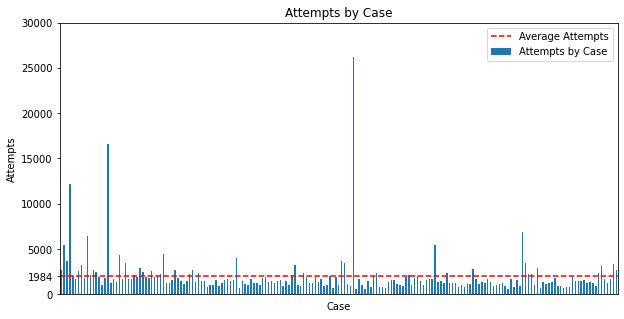

<Figure size 432x288 with 0 Axes>

In [52]:
# plot attempts (y) in decreasing order of solve rate with a bar chart
df.sort_values(by='solve_rate', ascending=False).plot.bar(x=None, y='attempts', figsize=(10, 5), title='Attempts by Case')
# skip x axes labels
plt.xticks([])
# add mean attempts as a horizontal line
plt.axhline(df['attempts'].mean(), color='r', linestyle='--')
# add mean attempts line to the legend
plt.legend(['Average Attempts', 'Attempts by Case'])

# add a y axis tick for the mean attempts
plt.yticks(np.append(plt.yticks()[0], df['attempts'].mean()))

# add x and y labels
plt.xlabel('Case')
plt.ylabel('Attempts')

plt.show()

# save as pdf
plt.savefig('figures/eda_attempts.pdf')




We see that the average number of attempts is around 2000, so the human evaluation is a very massive in this dataset.

Let's look at the distribution of attempts over the puzzle sovle rates.

The graph says that users do not attempt to solve hard puzzles more often than easy puzzles.

### Number of answer options

In [53]:


# count number of cases with 3,4, and 5 answer options
df['answer_options_count'].value_counts()

4    160
5     30
3      1
Name: answer_options_count, dtype: int64

This table shows that most answers have 4 or 5 answer options and they do not correlate with solve rates.

### Let's look at how long our puzzles are

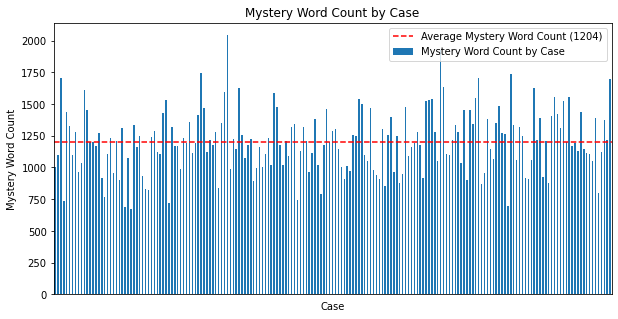

In [54]:
# plot mystery word count (y) in decreasing order of solve rate with a bar chart
df['mystery_text_length'] = df['mystery_text'].str.split(' ').str.len()
df.sort_values(by='solve_rate', ascending=False).plot.bar(x=None, y='mystery_text_length', figsize=(10, 5), title='Mystery Word Count by Case')
# skip x axes labels
plt.xticks([])
# add mean mystery text length as a horizontal line
plt.axhline(df['mystery_text_length'].mean(), color='r', linestyle='--')
# add mean mystery text length line to the legend
plt.legend(['Average Mystery Word Count (1204)', 'Mystery Word Count by Case'])

# add x and y labels
plt.xlabel('Case')
plt.ylabel('Mystery Word Count')

# save as pdf
plt.savefig('figures/eda_mystery_word_count.pdf')


In [40]:
# average number of words in mystery text
df['mystery_text_word_count'].mean()

1204.4450261780105

We see that puzzles are 2000 words at most and solve rate does not correlate with the length of the puzzle.

Let's repeat the same for the full answer.

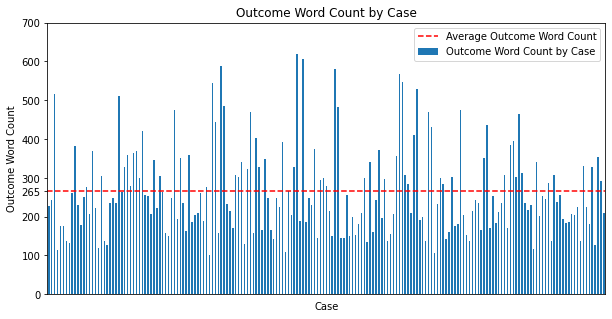

In [55]:
# plot mystery 'outcome' length (y) in decreasing order of solve rate with a bar chart
df['outcome_length'] = df['outcome'].str.split(' ').str.len()
df.sort_values(by='solve_rate', ascending=False).plot.bar(x=None, y='outcome_length', figsize=(10, 5), title='Outcome Word Count by Case')
# skip x axes labels
plt.xticks([])
# add mean outcome length as a horizontal line
plt.axhline(df['outcome_length'].mean(), color='r', linestyle='--')
# add y tick for the mean outcome length
plt.yticks(np.append(plt.yticks()[0], df['outcome_length'].mean()))
# add mean outcome length line to the legend
plt.legend(['Average Outcome Word Count', 'Outcome Word Count by Case'])

# add x and y labels
plt.xlabel('Case')
plt.ylabel('Outcome Word Count')

# save as pdf
plt.savefig('figures/eda_outcome_word_count.pdf')




In [56]:
# get the average number of words in outcome
df['outcome_length'].mean()


264.9005235602094

Full answers are up to 600 words and solve rate does not correlate with the length of the full answer.

### Summary

As the graphs above do not correlate with the solve rate, we can just use box plots to concisely and fully summarize the statistics of the dataset.

Text(0, 0.5, 'Solve Rate')

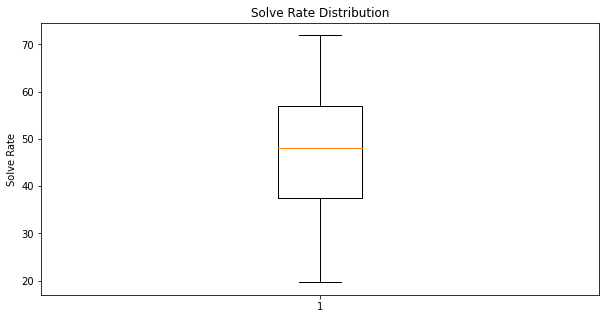

In [82]:
# make the solve_rate figure a boxplot using plt and not pandas
plt.figure(figsize=(10, 5))
plt.boxplot(df['solve_rate'])
plt.title('Solve Rate Distribution')
plt.ylabel('Solve Rate')
# plt.savefig('figures/eda_solve_rate_boxplot.pdf')


In [210]:
# remove outcome_word_count column
df.drop(columns=['outcome_word_count'], inplace=True)
df.drop(columns=['mystery_word_count'], inplace=True)


In [211]:
# create amd add  mystery_word_count and outcome_word_count to df
df['mystery_word_count'] = df['mystery_text'].str.split(' ').str.len()
df['outcome_word_count'] = df['outcome'].str.split(' ').str.len()

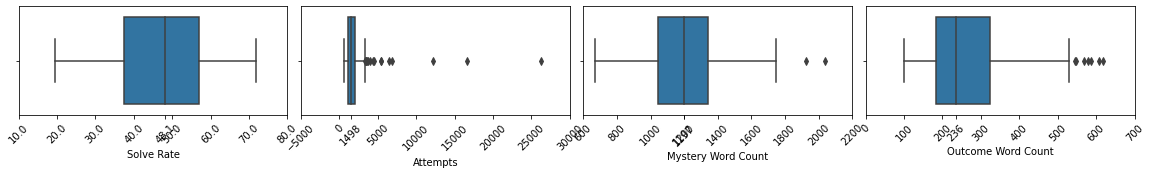

In [214]:
# plot last 4 figures in one 1x4 grid
fig, axes = plt.subplots(1, 4, figsize=(20, 2))
sns.boxplot(x='solve_rate', data=df.sort_values(by='solve_rate', ascending=False), orient='h', ax=axes[0])
sns.boxplot(x='attempts', data=df.sort_values(by='solve_rate', ascending=False), orient='h', ax=axes[1])
sns.boxplot(x='mystery_word_count', data=df.sort_values(by='solve_rate', ascending=False), orient='h', ax=axes[2])
sns.boxplot(x='outcome_word_count', data=df.sort_values(by='solve_rate', ascending=False), orient='h', ax=axes[3])

# decrease space between subplots
plt.subplots_adjust(wspace=0.05)

# add more ticks to attempt boxplot

# make all tickes angeled
for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)


# add x labels
axes[0].set_xlabel('Solve Rate')
axes[1].set_xlabel('Attempts')
axes[2].set_xlabel('Mystery Word Count')
axes[3].set_xlabel('Outcome Word Count')

# add median value as x-tick to each boxplot
for ax in axes:
    ax.set_xticks(np.append(ax.get_xticks(), df["_".join(ax.get_xlabel().lower().split(" "))].median()))


# save as pdf
plt.savefig('figures/eda_boxplots.pdf')

<AxesSubplot:xlabel='solve_rate'>

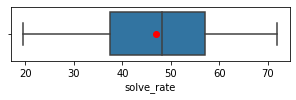

In [268]:
fig, ax = plt.subplots(figsize=(5, 1))
# showmeans=True shows the mean as a dot, make it white dot
sns.boxplot(x='solve_rate', data=df.sort_values(by='solve_rate', ascending=False), orient='h', ax=ax, 
showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})



In [269]:
ax.get_xticks()

array([10., 20., 30., 40., 50., 60., 70., 80.])

In [273]:
import numpy as np

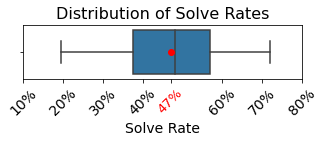

In [311]:
# Now save these 4 boxplos as separate pdf for each figure
# for this create new figures
fig, ax = plt.subplots(figsize=(5, 1))
# showmeans=True shows the mean as a dot, make it white dot
sns.boxplot(x='solve_rate', data=df.sort_values(by='solve_rate', ascending=False), orient='h', ax=ax, 
showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})

# remove tick with index 4
ax.set_xticks(np.delete(ax.get_xticks(), 4))


# add tick for the mean in red
ax.set_xticks(np.append(ax.get_xticks(), df['solve_rate'].mean()))


# make it red
ax.get_xticklabels()[-1].set_color('red')



# add label names
ax.set_xlabel('Solve Rate')

# add percentage symbol to x ticks
ax.set_xticklabels([str(int(x)) + '%' for x in ax.get_xticks()])

# add title
ax.set_title('Distribution of Solve Rates')

# make fonts bigger
ax.tick_params(labelsize=14)
ax.title.set_fontsize(16)
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)

# make the red one smaller
ax.get_xticklabels()[-1].set_fontsize(13)

# make ticks angled
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# save as pdf
plt.savefig('figures/eda_solve_rate_boxplot.pdf', bbox_inches='tight')

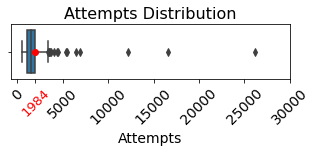

In [312]:
# analogues plot for attempts
fig, ax = plt.subplots(figsize=(5, 1))
sns.boxplot(x='attempts', data=df.sort_values(by='solve_rate', ascending=False), orient='h', ax=ax,
showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})

# remove first tick
ax.set_xticks(ax.get_xticks()[1:])

# add tick for the mean in red
ax.set_xticks(np.append(ax.get_xticks(), df['attempts'].mean()))

# make it red
ax.get_xticklabels()[-1].set_color('red')

# add label names
ax.set_xlabel('Attempts')

# add title
ax.set_title('Attempts Distribution')

# make fonts bigger
ax.tick_params(labelsize=14)
ax.title.set_fontsize(16)
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)

# make the red one smaller
ax.get_xticklabels()[-1].set_fontsize(13)

# make ticks angled
for tick in ax.get_xticklabels():
    tick.set_rotation(45)



# save as pdf
plt.savefig('figures/eda_attempts_boxplot.pdf', bbox_inches='tight')



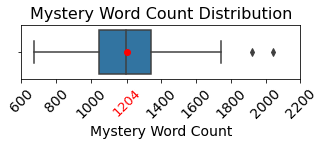

In [313]:
# analogues plot for mystery_word_count
fig, ax = plt.subplots(figsize=(5, 1))
sns.boxplot(x='mystery_word_count', data=df.sort_values(by='solve_rate', ascending=False), orient='h', ax=ax,
showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})

# add tick for the mean in red
ax.set_xticks(np.append(ax.get_xticks(), df['mystery_word_count'].mean()))

# remove tick with index 3
ax.set_xticks(ax.get_xticks()[[i for i in range(len(ax.get_xticks())) if i != 3]])

# make it red
ax.get_xticklabels()[-1].set_color('red')

# add label names
ax.set_xlabel('Mystery Word Count')

# add title
ax.set_title('Mystery Word Count Distribution')

# make fonts bigger
ax.tick_params(labelsize=14)
ax.title.set_fontsize(16)
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)

# make the red one smaller
ax.get_xticklabels()[-1].set_fontsize(13)

# make ticks angled
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# save as pdf
plt.savefig('figures/eda_mystery_word_count_boxplot.pdf', bbox_inches='tight')

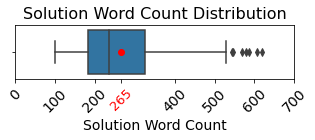

In [314]:
# analogues plot for outcome_word_count
fig, ax = plt.subplots(figsize=(5, 1))
sns.boxplot(x='outcome_word_count', data=df.sort_values(by='solve_rate', ascending=False), orient='h', ax=ax,
showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})

# add tick for the mean in red
ax.set_xticks(np.append(ax.get_xticks(), df['outcome_word_count'].mean()))

# remove tick with index 3
ax.set_xticks(ax.get_xticks()[[i for i in range(len(ax.get_xticks())) if i != 3]])

# make it red
ax.get_xticklabels()[-1].set_color('red')

# add label names
ax.set_xlabel('Solution Word Count')

# add title
ax.set_title('Solution Word Count Distribution')

# make fonts bigger
ax.tick_params(labelsize=14)
ax.title.set_fontsize(16)
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)

# make the red one smaller
ax.get_xticklabels()[-1].set_fontsize(13)

# make ticks angled
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# save as pdf
plt.savefig('figures/eda_outcome_word_count_boxplot.pdf', bbox_inches='tight')

In [329]:
# print text of the most attempted puzzle under 650 words
print(df[df['mystery_word_count'] < 700].sort_values(by='attempts', ascending=False).iloc[0])



case_name                                          The Easter Egg Mystery
case_url                https://www.5minutemystery.com/mystery/the-eas...
author_name                                                    Tom Fowler
author_url                  https://www.5minutemystery.com/author/tfowler
attempts                                                             1871
solve_rate                                                           60.8
mystery_text            Karen Sheldon had loved Easter egg hunts ever ...
answer_options          (a) Anna; (b) Cole; (c) Justin; (d) Lizzie; (e...
answer                                                         (d) Lizzie
outcome                 Good naturedly, Karla exclaimed, “How do you k...
answer_options_count                                                    5
mystery_text_length                                                   669
mystery_word_count                                                    669
outcome_word_count                    

In [338]:
# print answer options
print(df[df['mystery_word_count'] < 1900].sort_values(by='attempts', ascending=False).iloc[20]['mystery_text'])

“You'll like it here,” said Debra. “Everything is a mystery.” Before I could digest the mystique of the mansion in front of me, or the height of its white columns, a gloomy butler swung open the door: “I heard your voices,” he barked. I gasped and swallowed my breath. Debra tried to mask her amusement and smiled at me, reassuringly: “You're just not used to rich people,” she said, pushing me forward. The butler, and the scowl on his face, led us down a long hallway where large statues of famous poets lined the walls: “Are they watching us?” I joked. Debra ignored my nervous sarcasm, thanked the butler cheerfully, and signaled me to follow her to the den. “My father's friends meet here every month,” she whispered. “And they play a very strange game.” Echoes from our own footsteps had me on edge as we made our way to a super-sized wooden door. Debra tapped on it playfully, and I held my breath. The hinges wept and moaned as the enormous door chiseled open, revealing a strange man who was

In [340]:
# what is the largest story (in words)?
print(df['mystery_word_count'].max())

2041


In [328]:
# print text of the most attempted puzzle under 650 words
print(df[df['mystery_word_count'] < 700].sort_values(by='attempts', ascending=False)['mystery_text'].iloc[0])


Karen Sheldon had loved Easter egg hunts ever since she was a little girl. That is why she eagerly volunteered to assist with this year’s Hunt for the children at her church. This year, the Children’s Day Out mothers decided to do something different. Because there were so many children of all ages in the congregation, they split the hunt up into age groups. Karen’s job was to oversee several of the 6-10 year olds. Within her group were five children she knew well. They were Rachel Smithson, whose mother Karla had volunteered to help a very grateful Karen, Justin Bates, a classmate of Rachel’s, Karen’s daughter Lizzie, Lizzie’s best friend Anna Laughlin and Cole Bryant, who was also the Sheldon’s next door neighbor. The Easter egg hunt was on Saturday morning, the day before Easter Sunday. It was held in the large field in back of the church. Karen and Karla were grateful that today was sunny and warm although it was a bit windy. Karen was excited as the children prepared for the hunt,

In [318]:
# top 5 shortest mysteries
df.sort_values(by='mystery_word_count').head(5)


,case_name,case_url,author_name,author_url,attempts,solve_rate,mystery_text,answer_options,answer,outcome,answer_options_count,mystery_text_length,mystery_word_count,outcome_word_count
48,The Easter Egg Mystery,https://www.5minutemystery.com/mystery/the-eas...,Tom Fowler,https://www.5minutemystery.com/author/tfowler,1871,60.8,Karen Sheldon had loved Easter egg hunts ever ...,(a) Anna; (b) Cole; (c) Justin; (d) Lizzie; (e...,(d) Lizzie,"Good naturedly, Karla exclaimed, “How do you k...",5,669,669,327
65,Riddle of the Confederate Spy,https://www.5minutemystery.com/mystery/riddle-...,Moe Zilla,https://www.5minutemystery.com/author/mzilla,1669,61.1,"Cannons fired in Maryland, as 45,000 Confedera...",(a) Garrett; (b) McMurty; (c) Parker; (d) Winslow,(c) Parker,"“I know it isn't McMurty,” said Sergeant Stoke...",4,690,690,510
123,A Thanksgiving Mystery Poem,https://www.5minutemystery.com/mystery/a-thank...,Moe Zilla,https://www.5minutemystery.com/author/mzilla,805,35.8,"For Thanksgiving, try this game.\nFind the gui...",(a) Libby; (b) Rusty; (c) Tiny; (d) Tom,(b) Rusty,"""Though the guilty one would hide\nthey'll soo...",4,698,698,234
21,Where is Matthew?,https://www.5minutemystery.com/mystery/where-i...,Tom Fowler,https://www.5minutemystery.com/author/tfowler,2647,58.9,"Five -year- old Andy, (5 1/2, as he would tell...",(a) Andy's bedroom; (b) Matthew's bedroom; (c)...,(e) The tree house,When they had retrieved the giggling Matthew f...,5,722,722,264
185,The Cornfield Caper,https://www.5minutemystery.com/mystery/the-cor...,Brad Marsh,https://www.5minutemystery.com/author/dottertr...,12140,71.4,Joe Farmer walked aimlessly through the freshl...,(a) Austin; (b) Billy; (c) Nick,(b) Billy,"""Billy!"" Joe said. ""Give it back.""\n""What do y...",3,734,734,113
